# Introdução

# Análise de Vendas de Jogos 
**Explorando Tendências, Plataformas e Comportamento do Mercado Gamer**  

---

## 📌 Contexto  
O mercado de jogos eletrônicos é um dos setores mais dinâmicos do entretenimento, com crescimento acelerado por inovações tecnológicas como cloud gaming, realidade virtual e consoles de última geração.

Este projeto analisa o dataset [Video Game Sales 2024](https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024) contendo dados de vendas de jogos até 2024, com o objetivo de responder a perguntas como:  
- 🎮 **Qual plataforma (PlayStation, Xbox, Nintendo, PC) dominou as vendas?**  
- 🌍 **Como as regiões (Américas, Europa, Ásia) influenciaram o sucesso de jogos?**  
- 📊 **Quais gêneros (ação, RPG, esportes) tiveram melhor desempenho?**  
- 💰 **Existe correlação entre datas de lançamento e picos de vendas?**

---

## 🎯 Objetivos  
1. Identificar **jogos e plataformas com maior impacto comercial**.  
2. Mapear **padrões regionais** de consumo.  
3. Analisar a **relação entre gêneros de jogos e desempenho de vendas**.  
4. Fornecer insights para **tomada de decisão estratégica** no setor.  

---

## 📂 Sobre o Dataset  
- **Fonte:** [Kaggle](https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024) os dados foram coletados do site [VGChartz](https://www.vgchartz.com/).  
- **Escopo:**  
  - +10 mil registros de vendas globais.  
  - Variáveis incluídas: `title`, `console`, `genre`, `publisher`, `developer`, `critic_score`, `total_sales`, `na_sales`, `jp_sales`, `pal_sales`, `other_sales`, `release_date`.  

# 0 - Importações

In [2]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

# 1 - Primeiras Manipulações

In [3]:
ds = pd.read_csv('../data/vgchartz-2024.csv', sep = ",")

ds.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [4]:
ds = ds.drop(columns = ["img", "last_update"])

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
dtypes: float64(6), object(6)
memory usage: 5.9+ MB


## 1.1 - Jogos Mais Vendidos

In [5]:
games_mais_vendido = ds.groupby("title")['total_sales'].sum().sort_values(ascending = False).head(10)

games_mais_vendido

title
Grand Theft Auto V                64.29
Call of Duty: Black Ops           30.99
Call of Duty: Modern Warfare 3    30.71
Call of Duty: Black Ops II        29.59
Call of Duty: Ghosts              28.80
Call of Duty: Black Ops 3         26.72
Call of Duty: Modern Warfare 2    25.02
Minecraft                         24.01
Grand Theft Auto IV               22.53
Call of Duty: Advanced Warfare    21.78
Name: total_sales, dtype: float64

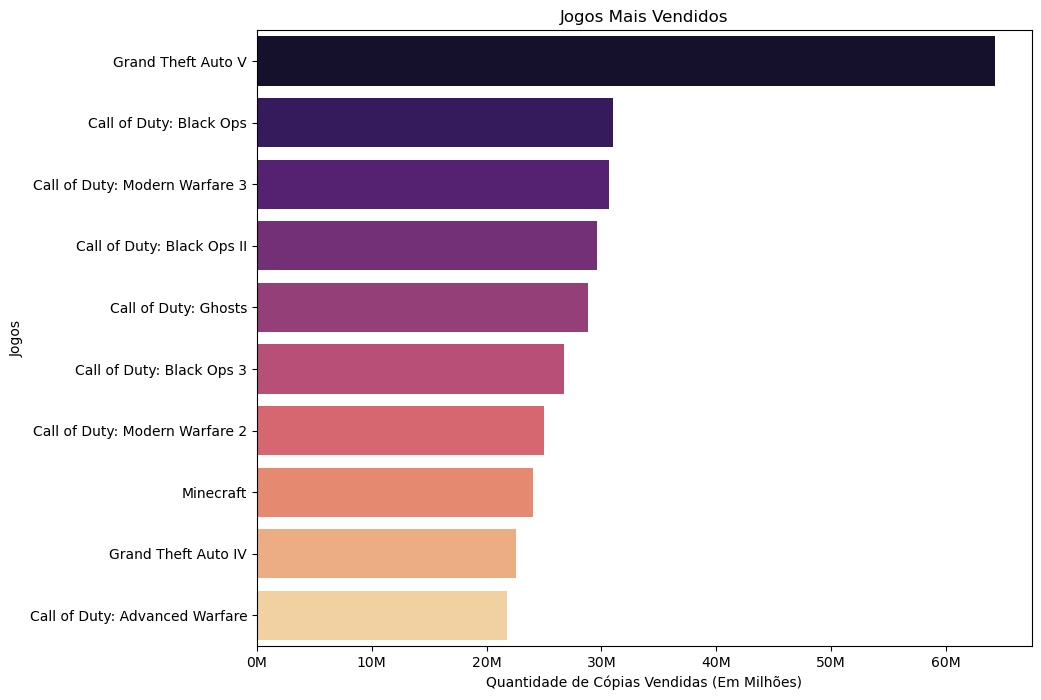

In [6]:
plt.figure(figsize = (10,8))

ax = sns.barplot(
    data = pd.DataFrame(games_mais_vendido),
    x = games_mais_vendido.values, 
    y = games_mais_vendido.index, 
    palette = "magma", 
    hue = games_mais_vendido.index, 
    legend = False)

def formatador(x, pos):
    return f'{x:.0f}M'

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formatador))

_ = plt.title("Jogos Mais Vendidos")

_ = plt.xlabel("Quantidade de Cópias Vendidas (Em Milhões)")

_ = plt.ylabel("Jogos")

plt.show()

In [7]:
plataformas = ds.groupby(["title", "console"])['total_sales'].sum().sort_values(ascending = False).head(10)

plataformas


title                           console
Grand Theft Auto V              PS3        20.32
                                PS4        19.39
Grand Theft Auto: Vice City     PS2        16.15
Grand Theft Auto V              X360       15.86
Call of Duty: Black Ops 3       PS4        15.09
Call of Duty: Modern Warfare 3  X360       14.82
Call of Duty: Black Ops         X360       14.74
Red Dead Redemption 2           PS4        13.94
Call of Duty: Black Ops II      X360       13.86
                                PS3        13.80
Name: total_sales, dtype: float64

In [23]:
df_pivot = plataformas.unstack(level='console').fillna(0)

df_pivot['Total'] = df_pivot.sum(axis=1)

df_pivot = df_pivot.sort_values('Total', ascending=True).drop('Total', axis=1)

df_pivot


console,PS3,PS4,PS2,X360
title,,,,
Red Dead Redemption 2,0.00,13.94,0.00,0.00
Call of Duty: Black Ops,0.00,0.00,0.00,14.74
Call of Duty: Modern Warfare 3,0.00,0.00,0.00,14.82
Call of Duty: Black Ops 3,0.00,15.09,0.00,0.00
Grand Theft Auto: Vice City,0.00,0.00,16.15,0.00
Call of Duty: Black Ops II,13.80,0.00,0.00,13.86
Grand Theft Auto V,20.32,19.39,0.00,15.86


In [24]:
consoles = [index[1] for index in plataformas.index]

consoles_unicos = np.unique(consoles)

cores = plt.cm.tab20b(np.linspace(0, 1, len(consoles_unicos)))

cores_console = dict(zip(consoles_unicos, cores))

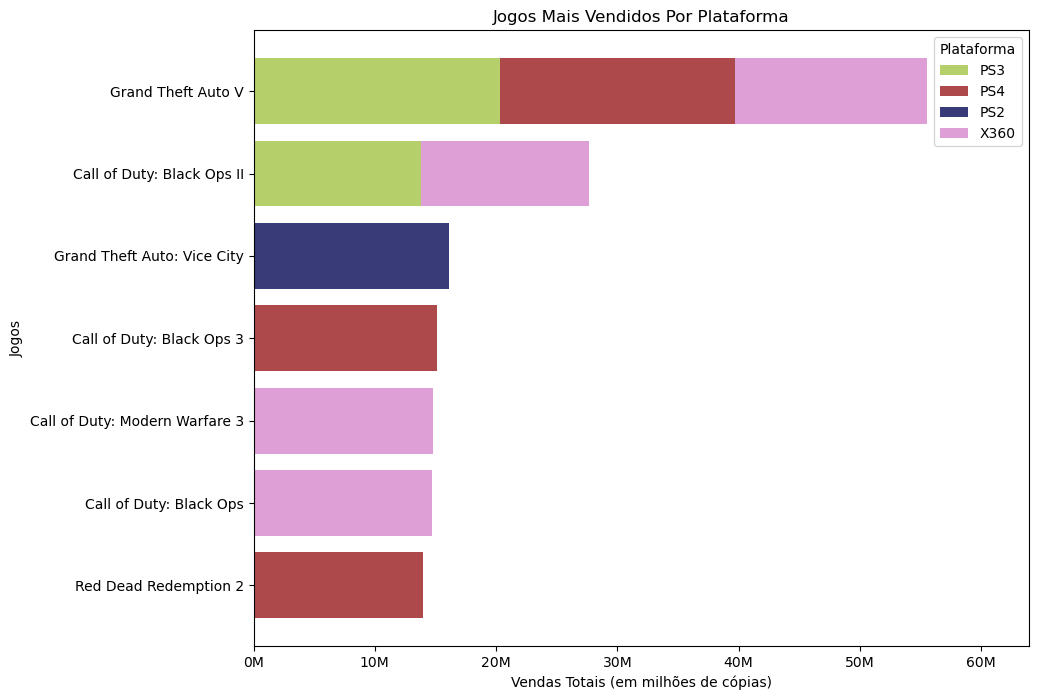

In [25]:
plt.figure(figsize=(10, 8))

jogos = df_pivot.index

y_pos = np.arange(len(jogos))

left = np.zeros(len(jogos))

for console in df_pivot.columns:

    vendas = df_pivot[console].values

    cores = cores_console[console]

    plt.barh(
        y_pos,
        vendas,
        left = left,
        color = cores,
        label = console
    )
    
    left += vendas

plt.yticks(y_pos, jogos)

plt.ylabel('Jogos')

plt.xlabel('Vendas Totais (em milhões de cópias)')

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formatador))

plt.xlim(0, df_pivot.sum(axis=1).max() * 1.15) 

handles, labels = plt.gca().get_legend_handles_labels()

labels_unicos = list(dict.fromkeys(labels))  


plt.legend(handles[:len(labels_unicos)], labels_unicos, title = "Plataforma", loc = "best")

plt.title("Jogos Mais Vendidos Por Plataforma")

plt.show()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
54,Minecraft,PS4,Misc,Sony Computer Entertainment,Mojang,9.4,6.33,1.89,0.35,3.13,0.96,2014-10-07
58,Minecraft,PS3,Misc,Sony Computer Entertainment America,Mojang,NaN,6.05,2.21,NaN,2.86,0.99,2014-05-16
69,Minecraft,XOne,Misc,Microsoft Studios,Mojang,NaN,5.43,3.23,NaN,1.71,0.49,2014-11-18
366,Minecraft,PSV,Misc,Sony Computer Entertainment America,4J Studios,NaN,2.47,0.22,1.25,0.73,0.27,2014-11-11
571,Minecraft,NS,Sandbox,Mojang,4J Studios,9.2,1.89,0.69,0.52,0.56,0.12,2018-06-21
849,Minecraft,WiiU,Misc,Mojang,4J Studios,5.5,1.47,0.50,0.38,0.49,0.09,2016-06-17
4477,Minecraft,3DS,Misc,Nintendo,Other Ocean Interactive,6.7,0.37,0.33,NaN,NaN,0.04,2017-11-10
29008,Minecraft,All,Action-Adventure,Mojang,Mojang AB,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-18
32178,Minecraft,PC,Misc,Mojang,Mojang AB,10.0,NaN,NaN,NaN,NaN,NaN,2010-05-10
32185,Minecraft,X360,Misc,Microsoft Studios,Mojang,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-04
